In [800]:
#  import of useful modules and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
from sklearn.model_selection import ParameterGrid
from nltk.corpus import stopwords
from nltk import pos_tag
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [801]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 19600)

In [802]:
path= "C:/Document sur disque/Formation OpenClassRooms/P6-DS-OC/Flipkart"
files = os.listdir(path)
files


['flipkart_com-ecommerce_sample_1050.csv', 'Images']

In [803]:
Dict = {}
#  the dictionnary can contain all the csv files needed
for file in files:
    if file[-4:] == '.csv':
        Dict[file[:-4]] = pd.read_csv(os.path.join(os.path.abspath(path), file))
        # pd.read_scv must receive a path not only a name of a file !!

In [804]:
for name, data in Dict.items():
    # thanks to Ana I progressed
    # Displays name and head of each DataFrame
    print(name, "\n")
    display(data.head(10))
    print(f"Nombre d'individus: {data.shape[0]}, Nombre de features:{data.shape[1]}")

flipkart_com-ecommerce_sample_1050 



uniq_id            crawl_timestamp                                        product_url                                       product_name                              product_category_tree               pid  retail_price  discounted_price                                 image  is_FK_Advantage_product                                        description       product_rating       overall_rating                  brand                             product_specifications
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000  http://www.flipkart.com/elegance-polyester-mul...  Elegance Polyester Multicolor Abstract Eyelet ...  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg                    False  Key Features of Elegance Polyester Multicolor ...  No rating available  No rating available               Elegance  {"product_specification"=>[{"key"=>"Brand", "v...
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000  http://www.flipkart.com/sathiyas-cotton-bath-t...                         Sathiyas Cotton Bath Towel  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg                    False  Specifications of Sathiyas Cotton Bath Towel (...  No rating available  No rating available               Sathiyas  {"product_specification"=>[{"key"=>"Machine Wa...
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000  http://www.flipkart.com/eurospa-cotton-terry-f...                Eurospa Cotton Terry Face Towel Set  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg                    False  Key Features of Eurospa Cotton Terry Face Towe...  No rating available  No rating available                Eurospa  {"product_specification"=>[{"key"=>"Material",...
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000  http://www.flipkart.com/santosh-royal-fashion-...  SANTOSH ROYAL FASHION Cotton Printed King size...  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...  No rating available  No rating available  SANTOSH ROYAL FASHION  {"product_specification"=>[{"key"=>"Brand", "v...
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000  http://www.flipkart.com/jaipur-print-cotton-fl...  Jaipur Print Cotton Floral King sized Double B...  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg                    False  Key Features of Jaipur Print Cotton Floral Kin...  No rating available  No rating available           Jaipur Print  {"product_specification"=>[{"key"=>"Machine Wa...
5  893aa5ed55f7cff2eccea7758d7a86bd  2015-12-04 07:25:36 +0000  http://www.flipkart.com/maserati-time-r8851116...  Maserati Time R8851116001 Analog Watch  - For ...  ["Watches >> Wrist Watches >> Maserati Time Wr...  WATEAYAHJ8CUCAYM       24400.0           24400.0  893aa5ed55f7cff2eccea7758d7a86bd.jpg                    False  Maserati Time R8851116001 Analog Watch  - For ...  No rating available  No rating available                    NaN  {"product_specification"=>[{"key"=>"Chronograp...
6  f355cc1ccb08bd0d283ed979b7ee7515  2015-12-04 07:25:36 +0000  http://www.flipkart.com/camerii-wm64-elegance-...  Camerii WM64 Elegance Analog Watch  - For Men,...  ["Watches >> Wrist Watches >> Camerii Wrist Wa...  WATE6Y6D2MZHWGBZ        1099.0             449.0  f355cc1ccb08bd0d283ed979b7ee7515.jpg                    False  Camerii WM64 Elegance Analog Watch  - For Men,...                    5                    5                    NaN  {"product_specification"=>[{"key"=>"Chronograp...
7  dd0e3470a7e6ed76fd69c2da27721041  2015-12-04 07:25:36 +00

Nombre d'individus: 1050, Nombre de features:15


In [805]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

EDA = Explorating Data Analysis

In [806]:
data1 = Dict["flipkart_com-ecommerce_sample_1050"]

In [807]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [808]:
data1.nunique()

uniq_id                    1050
crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
dtype: int64

# identify the main categories we plan to use as labels to plot T-SNE or PCA. 

In [809]:
listes = data1.product_category_tree.unique().tolist()
categories  =[]
for tree in range(len(listes)):
    categories.append(listes[tree][:(listes[tree].find(">>"))])
set(categories)

{'["Baby Care ',
 '["Beauty and Personal Care ',
 '["Computers ',
 '["Home Decor & Festive Needs ',
 '["Home Furnishing ',
 '["Kitchen & Dining ',
 '["Watches '}

In [810]:
# Create a dictionnary for those categories
MycategoriesSet =  [(0 , '["Baby Care') ,
                (1, '["Beauty and Personal Care') ,
                (2,'["Computers'),
                (3,'["Home Decor & Festive Needs'),
                (4,'["Home Furnishing'),
                (5,'["Kitchen & Dining'), (6, '["Watches')]

In [811]:
len(MycategoriesSet)

7

In [812]:
MycategoriesSet[5][0]

5

In [813]:
MycategoriesSet[6]

(6, '["Watches')

In [814]:
for row in data1.iterrows():
    if 'Baby Care' in data1.product_category_tree.to_list():
        print('Yes')

In [815]:
data1.head()

uniq_id            crawl_timestamp                                        product_url                                       product_name                              product_category_tree               pid  retail_price  discounted_price                                 image  is_FK_Advantage_product                                        description       product_rating       overall_rating                  brand                             product_specifications
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000  http://www.flipkart.com/elegance-polyester-mul...  Elegance Polyester Multicolor Abstract Eyelet ...  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg                    False  Key Features of Elegance Polyester Multicolor ...  No rating available  No rating available               Elegance  {"product_specification"=>[{"key"=>"Brand", "v...
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000  http://www.flipkart.com/sathiyas-cotton-bath-t...                         Sathiyas Cotton Bath Towel  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg                    False  Specifications of Sathiyas Cotton Bath Towel (...  No rating available  No rating available               Sathiyas  {"product_specification"=>[{"key"=>"Machine Wa...
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000  http://www.flipkart.com/eurospa-cotton-terry-f...                Eurospa Cotton Terry Face Towel Set  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg                    False  Key Features of Eurospa Cotton Terry Face Towe...  No rating available  No rating available                Eurospa  {"product_specification"=>[{"key"=>"Material",...
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000  http://www.flipkart.com/santosh-royal-fashion-...  SANTOSH ROYAL FASHION Cotton Printed King size...  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...  No rating available  No rating available  SANTOSH ROYAL FASHION  {"product_specification"=>[{"key"=>"Brand", "v...
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000  http://www.flipkart.com/jaipur-print-cotton-fl...  Jaipur Print Cotton Floral King sized Double B...  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg                    False  Key Features of Jaipur Print Cotton Floral Kin...  No rating available  No rating available           Jaipur Print  {"product_specification"=>[{"key"=>"Machine Wa...

In [816]:
ll =data1.product_category_tree.tolist()
for i in range(len(ll)):
    for j in range(7):
        if ll[i].startswith(MycategoriesSet[j][1]):
            data1.loc[i,"labels"] = MycategoriesSet[j][0]


In [817]:
for i in range(7):
    if MycategoriesSet[i][1] in data1.loc[:,"product_category_tree"]:
        data['labels'] = MycategoriesSet[i][0]

In [818]:
data1['labels'].value_counts()

4.0    150
0.0    150
6.0    150
3.0    150
5.0    150
1.0    150
2.0    150
Name: labels, dtype: int64

In [819]:
listes[3]

'["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]'

In [820]:
data1.describe(include='object')

uniq_id            crawl_timestamp                                        product_url                                       product_name                              product_category_tree               pid                                 image                                        description       product_rating       overall_rating         brand                             product_specifications
count                               1050                       1050                                               1050                                               1050                                               1050              1050                                  1050                                               1050                 1050                 1050           712                                               1049
unique                              1050                        149                                               1050                                               1050                                                642              1050                                  1050                                               1050                   27                   27           490                                                984
top     55b85ea15a1536d46b7190ad6fff8ce7  2015-12-01 12:40:44 +0000  http://www.flipkart.com/elegance-polyester-mul...  Elegance Polyester Multicolor Abstract Eyelet ...  ["Home Furnishing >> Bed Linen >> Blankets, Qu...  CRNEG7BKMFFYHQ8Z  55b85ea15a1536d46b7190ad6fff8ce7.jpg  Key Features of Elegance Polyester Multicolor ...  No rating available  No rating available  PRINT SHAPES  {"product_specification"=>[{"key"=>"Type", "va...
freq                                   1                        150                                                  1                                                  1                                                 56                 1                                     1                                                  1                  889                  889            11                                                 22

In [821]:
data1.description.apply(lambda n:len(n)).sort_values()
#  this is to calculate the nombers of words in each single item description.

877      109
890      109
1030     111
651      112
892      112
        ... 
589     2436
916     2529
715     2594
639     3447
437     3490
Name: description, Length: 1050, dtype: int64

In [822]:
data1.head(20)

uniq_id            crawl_timestamp                                        product_url                                       product_name                              product_category_tree               pid  retail_price  discounted_price                                 image  is_FK_Advantage_product                                        description       product_rating       overall_rating                  brand                             product_specifications  labels
0   55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000  http://www.flipkart.com/elegance-polyester-mul...  Elegance Polyester Multicolor Abstract Eyelet ...  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg                    False  Key Features of Elegance Polyester Multicolor ...  No rating available  No rating available               Elegance  {"product_specification"=>[{"key"=>"Brand", "v...     4.0
1   7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000  http://www.flipkart.com/sathiyas-cotton-bath-t...                         Sathiyas Cotton Bath Towel  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg                    False  Specifications of Sathiyas Cotton Bath Towel (...  No rating available  No rating available               Sathiyas  {"product_specification"=>[{"key"=>"Machine Wa...     0.0
2   64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000  http://www.flipkart.com/eurospa-cotton-terry-f...                Eurospa Cotton Terry Face Towel Set  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg                    False  Key Features of Eurospa Cotton Terry Face Towe...  No rating available  No rating available                Eurospa  {"product_specification"=>[{"key"=>"Material",...     0.0
3   d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000  http://www.flipkart.com/santosh-royal-fashion-...  SANTOSH ROYAL FASHION Cotton Printed King size...  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...  No rating available  No rating available  SANTOSH ROYAL FASHION  {"product_specification"=>[{"key"=>"Brand", "v...     4.0
4   6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000  http://www.flipkart.com/jaipur-print-cotton-fl...  Jaipur Print Cotton Floral King sized Double B...  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg                    False  Key Features of Jaipur Print Cotton Floral Kin...  No rating available  No rating available           Jaipur Print  {"product_specification"=>[{"key"=>"Machine Wa...     4.0
5   893aa5ed55f7cff2eccea7758d7a86bd  2015-12-04 07:25:36 +0000  http://www.flipkart.com/maserati-time-r8851116...  Maserati Time R8851116001 Analog Watch  - For ...  ["Watches >> Wrist Watches >> Maserati Time Wr...  WATEAYAHJ8CUCAYM       24400.0           24400.0  893aa5ed55f7cff2eccea7758d7a86bd.jpg                    False  Maserati Time R8851116001 Analog Watch  - For ...  No rating available  No rating available                    NaN  {"product_specification"=>[{"key"=>"Chronograp...     6.0
6   f355cc1ccb08bd0d283ed979b7ee7515  2015-12-04 07:25:36 +0000  http://www.flipkart.com/camerii-wm64-elegance-...  Camerii WM64 Elegance Analog Watch  - For Men,...  ["Watches >> Wrist Watches >> Camerii Wrist Wa...  WATE6Y6D2MZHWGBZ        1099.0             449.0  f355cc1ccb08bd0d283ed979b7ee7515.jpg                    False  Camerii WM64 Elegance Analog Watch  - For Men,...                    5                    5                    NaN  {"product_specification"=>[{"key"=>"Chronograp.

In [823]:
Cols = ['product_name', 'description', 'labels']
data1 = data1[Cols]
data1

product_name                                        description  labels
0     Elegance Polyester Multicolor Abstract Eyelet ...  Key Features of Elegance Polyester Multicolor ...     4.0
1                            Sathiyas Cotton Bath Towel  Specifications of Sathiyas Cotton Bath Towel (...     0.0
2                   Eurospa Cotton Terry Face Towel Set  Key Features of Eurospa Cotton Terry Face Towe...     0.0
3     SANTOSH ROYAL FASHION Cotton Printed King size...  Key Features of SANTOSH ROYAL FASHION Cotton P...     4.0
4     Jaipur Print Cotton Floral King sized Double B...  Key Features of Jaipur Print Cotton Floral Kin...     4.0
...                                                 ...                                                ...     ...
1045     Oren Empower Extra Large Self Adhesive Sticker  Oren Empower Extra Large Self Adhesive Sticker...     0.0
1046             Wallmantra Large Vinyl Sticker Sticker  Wallmantra Large Vinyl Sticker Sticker (Pack o...     0.0
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...  Buy Uberlyfe Extra Large Pigmented Polyvinyl F...     0.0
1048            Wallmantra Medium Vinyl Sticker Sticker  Buy Wallmantra Medium Vinyl Sticker Sticker fo...     0.0
1049                       Uberlyfe Large Vinyl Sticker  Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...     0.0

[1050 rows x 3 columns]

TOKENIZATION

In [824]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [825]:
doc= data1.sample(10)
doc

product_name                                        description  labels
694  Tallenge Christmas Collection - Echoes Of Wint...  Tallenge Christmas Collection - Echoes Of Wint...     3.0
979        dongli Striped Baby Boy's Polo Neck T-Shirt  Specifications of dongli Striped Baby Boy's Po...     0.0
330             Asus RT-N12 LX 300Mbps Wireless Router  Buy Asus RT-N12 LX 300Mbps Wireless Router onl...     2.0
770                Offspring Solid Single Blanket Pink  Buy Offspring Solid Single Blanket Pink at Rs....     0.0
461                 vatika Advance Standard Idli Maker  Key Features of vatika Advance Standard Idli M...     5.0
353      Asus DSL-N10E Wireless-N150 ADSL Modem Router  Buy Asus DSL-N10E Wireless-N150 ADSL Modem Rou...     2.0
495                              Sonata 7007YL08 Watch  Sonata 7007YL08 Watch - Buy Sonata 7007YL08 Wa...     6.0
466  Shaun Printed Baby Boy's Yellow, Grey, Black T...  Key Features of Shaun Printed Baby Boy's Yello...     0.0
854  KLIQVIK SIX PORT USB HUB FOR ANDROID MOBILES T...  Buy KLIQVIK SIX PORT USB HUB FOR ANDROID MOBIL...     2.0
998                Happiness Is Printed Bone China Mug  Key Features of Happiness Is Printed Bone Chin...     5.0

In [826]:
for idx, ser  in doc.iterrows():
    txt_output = f"Product : {ser['product_name']}\n"
    print(txt_output + ser['description'] + "..." + "\n\n")

Product : Tallenge Christmas Collection - Echoes Of Winter - Gallery Wrap Canvas Painting
Tallenge Christmas Collection - Echoes Of Winter - Gallery Wrap Canvas Painting (15 inch x 15 inch)
                         Price: Rs. 1,799
				
			The countdown is on! Time to select gifts for friends and families, and maybe something for yourself too. The Tallenge Store brings you a Christmas Art Collection that will make the Season of giving awesome for you as you spreading that holiday cheer. From cuddly puppies to Christmas-coloured abstract art, we have everything covered in this fresh collection. Say it with art and leave a lasting impression. 

The beautiful photo is printed on a high quality 240 gsm coated imported canvas with a gloss finish using a high resolution HP Inkjet large format production printer delivering sophisticated and elegant museum quality prints. It comes in a convenient size -15 inches X 15 inches with hook and is perfect for keeping it on office desk or table top. 


In [827]:
Mydata_description = data['description'].sample(3).to_numpy()
Mydata_description =  Mydata_description[2].lower()
Mydata_description

'perucci pc-122 decker analog watch  - for men - buy perucci pc-122 decker analog watch  - for men  pc-122 online at rs.290 in india only at flipkart.com. beautifull watches, comfortable watches, fancy watche, stylish watches - great discounts, only genuine products, 30 day replacement guarantee, free shipping. cash on delivery!'

In [828]:
from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize
from nltk.tokenize import RegexpTokenizer

First tokenizer = word_tokenize

In [829]:
def display_tokens_info(tokens):
    """ display info about corpus"""
    print(f'Nb of tokens : {len(tokens)}, nb of single tokens : {len(set(tokens))}')
    print(tokens[:30])

In [830]:
tokens = word_tokenize (Mydata_description)
len(tokens)
tokens

['perucci',
 'pc-122',
 'decker',
 'analog',
 'watch',
 '-',
 'for',
 'men',
 '-',
 'buy',
 'perucci',
 'pc-122',
 'decker',
 'analog',
 'watch',
 '-',
 'for',
 'men',
 'pc-122',
 'online',
 'at',
 'rs.290',
 'in',
 'india',
 'only',
 'at',
 'flipkart.com',
 '.',
 'beautifull',
 'watches',
 ',',
 'comfortable',
 'watches',
 ',',
 'fancy',
 'watche',
 ',',
 'stylish',
 'watches',
 '-',
 'great',
 'discounts',
 ',',
 'only',
 'genuine',
 'products',
 ',',
 '30',
 'day',
 'replacement',
 'guarantee',
 ',',
 'free',
 'shipping',
 '.',
 'cash',
 'on',
 'delivery',
 '!']

In [831]:
display_tokens_info(tokens)

Nb of tokens : 59, nb of single tokens : 38
['perucci', 'pc-122', 'decker', 'analog', 'watch', '-', 'for', 'men', '-', 'buy', 'perucci', 'pc-122', 'decker', 'analog', 'watch', '-', 'for', 'men', 'pc-122', 'online', 'at', 'rs.290', 'in', 'india', 'only', 'at', 'flipkart.com', '.', 'beautifull', 'watches']


In [832]:
tokens = wordpunct_tokenize (Mydata_description)
display_tokens_info(tokens)

Nb of tokens : 69, nb of single tokens : 41
['perucci', 'pc', '-', '122', 'decker', 'analog', 'watch', '-', 'for', 'men', '-', 'buy', 'perucci', 'pc', '-', '122', 'decker', 'analog', 'watch', '-', 'for', 'men', 'pc', '-', '122', 'online', 'at', 'rs', '.', '290']


Stopwords

In [833]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [834]:
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]
display_tokens_info(tokens)

Nb of tokens : 61, nb of single tokens : 36
['perucci', 'pc', '-', '122', 'decker', 'analog', 'watch', '-', 'men', '-', 'buy', 'perucci', 'pc', '-', '122', 'decker', 'analog', 'watch', '-', 'men', 'pc', '-', '122', 'online', 'rs', '.', '290', 'india', 'flipkart', '.']


Second Tokenizer = RegexpTokenizer

In [835]:
tokenizer = RegexpTokenizer(r"\w+")
tokens = tokenizer.tokenize(Mydata_description)
display_tokens_info(tokens) 

Nb of tokens : 51, nb of single tokens : 37
['perucci', 'pc', '122', 'decker', 'analog', 'watch', 'for', 'men', 'buy', 'perucci', 'pc', '122', 'decker', 'analog', 'watch', 'for', 'men', 'pc', '122', 'online', 'at', 'rs', '290', 'in', 'india', 'only', 'at', 'flipkart', 'com', 'beautifull']


In [836]:
tokens = [word for word in tokens if word not in stop_words]
display_tokens_info(tokens)

Nb of tokens : 43, nb of single tokens : 32
['perucci', 'pc', '122', 'decker', 'analog', 'watch', 'men', 'buy', 'perucci', 'pc', '122', 'decker', 'analog', 'watch', 'men', 'pc', '122', 'online', 'rs', '290', 'india', 'flipkart', 'com', 'beautifull', 'watches', 'comfortable', 'watches', 'fancy', 'watche', 'stylish']


In [837]:
Sentence = "Demain, dès l'aube, je+partirai, vois-tu je ne puis demeurer loin de toi plus longtemps."
Sentence2 = " Pourquoi un chien très moche, un cheval lourdement fourbu, un rat*auraient-ils la vie, Et toi si belle, chatoiement sage, plus un souffle ? Tu ne reviendras plus, Jamais, jamais, jamais, jamais, jamais ! "

## Essais

In [838]:
Xanadu = "In Xanadu did Kubla Khan A stately pleasure-dome decree:Where Alph, the sacred river, ran Through caverns measureless to man Down to a sunless sea. So twice five miles of fertile groundWith walls and towers were girdled round; And there were gardens bright with sinuous rills, where blossomed many an incense-bearing tree; And here were forests ancient as the hills, Enfolding sunny spots of greenery."

In [839]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [840]:
tokenizer = RegexpTokenizer(r"\w+")
# Sentence.replace('-', ' ')
tokens = tokenizer.tokenize(Sentence2)
Sentence2.lower()

' pourquoi un chien très moche, un cheval lourdement fourbu, un rat*auraient-ils la vie, et toi si belle, chatoiement sage, plus un souffle ? tu ne reviendras plus, jamais, jamais, jamais, jamais, jamais ! '

In [841]:
# def stop_word_filter_fct(list_words) :
#     adverbs = []
#     filtered_w = [w for w in list_words if not w in stop_words]
#     filtered_w2 = [w for w in filtered_w if len(w) > 2]
#     filtered_w3 = nltk.pos_tag(filtered_w2)
#     for t in range(len(filtered_w3)):
#         if filtered_w3[t][1] == 'RB':
#             adverbs.append(filtered_w3[t][0])
#         filtered_w = [w for w in filtered_w if not w in adverbs ]

#     return filtered_w

In [842]:
tokens = tokenizer.tokenize(Xanadu)
len(tokens)

67

In [843]:
XANADUfiltered = stop_word_filter_fct(tokens)
len(XANADUfiltered)
# XANADUfiltered

45

 ## A function to prepare a document to be processed in a bag of words

In [1022]:
tokenizer = RegexpTokenizer(r"\w+")
stop_words = set(stopwords.words('english'))

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def display_tokens_info(tokens):
    """ display info about corpus"""
    print(f'Nb of tokens : {len(tokens)}, nb of single tokens : {len(set(tokens))}')
    print(tokens[:30])

def stop_word_filter_fct(list_words) :
    adverbs_and_adjectives = []
    filtered_w = [w for w in list_words if not w in stop_words]
    # filtered_w2 = [w for w in filtered_w if len(w) > 2]
    filtered_w3 = nltk.pos_tag(filtered_w)
    for t in range(len(filtered_w3)):
        if (filtered_w3[t][1] == 'RB' or filtered_w3[t][1] == 'CD'):
            adverbs_and_adjectives.append(filtered_w3[t][0])
    filtered_w = [w for w in filtered_w if not w in adverbs_and_adjectives]

    return filtered_w

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w
     
def transform_for_bagging (tokenizer,
                            document,
                            rejoin=False) :

    document = document.lower().strip()
    # Strip to remove space at the beginning and at the end of the document
        
    tokens = tokenizer.tokenize(document)
    display_tokens_info(tokens)

    tokens_filtered = stop_word_filter_fct(tokens)
    display_tokens_info(tokens)

    tokens_filtered_lemmatised  = lemma_fct(tokens_filtered)

    if rejoin:
        return " ".join(tokens_filtered_lemmatised)
    return tokens_filtered_lemmatised

In [1032]:
data1['product_name'].tolist()

['Elegance Polyester Multicolor Abstract Eyelet Door Curtain',
 'Sathiyas Cotton Bath Towel',
 'Eurospa Cotton Terry Face Towel Set',
 'SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet',
 'Jaipur Print Cotton Floral King sized Double Bedsheet',
 'Maserati Time R8851116001 Analog Watch  - For Boys',
 'Camerii WM64 Elegance Analog Watch  - For Men, Boys',
 'T STAR UFT-TSW-005-BK-BR Analog Watch  - For Boys',
 'Alfajr WY16B Youth Digital Watch  - For Men, Boys',
 'TAG Heuer CAU1116.BA0858 Formula 1 Analog Watch  - For Boys, Men',
 'Calibro SW-125 Analog-Digital Watch  - For Men, Boys',
 'Cartier W6701005 Analog Watch  - For Boys, Men',
 'Lois Caron LCS-4032 Analog Watch  - For Boys, Men',
 'Titan 1639SL03 Analog Watch  - For Boys, Men',
 'Srushti Art Jewelry Megnet_Led_Sport_BlackRed1 Digital Watch  - For Men, Women, Boys, Girls',
 'Escort E-1700-906_Blk Analog Watch  - For Men, Boys',
 'Jack klein BlackLed Digital Watch  - For Boys',
 'North Moon IW-005-FK Silicone Ion Dig

In [1033]:
tokens = tokenizer.tokenize(data1['product_name'].tolist())

TypeError: expected string or bytes-like object

In [1031]:
adverbs_and_adjectives = []
tokens = tokenizer.tokenize(data1['product_name'].tolist())
filtered_w3 = nltk.pos_tag(tokens)
for t in range(len(filtered_w3)):
    if (filtered_w3[t][1] == 'RB' or filtered_w3[t][1] == 'CD'):
        adverbs_and_adjectives.append(filtered_w3[t][0])
    filtered_w = [w for w in filtered_w3 if not w in adverbs_and_adjectives]
print(filtered_w)

TypeError: expected string or bytes-like object

In [1023]:
data_filtered = pd.DataFrame()
data_filtered['description'] = data1["description"].apply(lambda x:transform_for_bagging(tokenizer, x, rejoin=True))
data_filtered['product_name'] = data1["product_name"].apply(lambda x:transform_for_bagging(tokenizer, x, rejoin=True))

Nb of tokens : 236, nb of single tokens : 132
['key', 'features', 'of', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'in', 'height', 'pack', 'of', '2', 'price', 'rs', '899', 'this']
Nb of tokens : 236, nb of single tokens : 132
['key', 'features', 'of', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'in', 'height', 'pack', 'of', '2', 'price', 'rs', '899', 'this']
Nb of tokens : 74, nb of single tokens : 48
['specifications', 'of', 'sathiyas', 'cotton', 'bath', 'towel', '3', 'bath', 'towel', 'red', 'yellow', 'blue', 'bath', 'towel', 'features', 'machine', 'washable', 'yes', 'material', 'cotton', 'design', 'self', 'design', 'general', 'brand', 'sathiyas', 'type', 'bath', 'towel', 'gsm']
Nb of toke

In [885]:
data_filtered

description                                       product_name
0     key feature elegance polyester multicolor abst...  elegance polyester multicolor abstract eyelet ...
1     specification sathiyas cotton bath towel bath ...                         sathiyas cotton bath towel
2     key feature eurospa cotton terry face towel se...                eurospa cotton terry face towel set
3     key feature santosh royal fashion cotton print...  santosh royal fashion cotton printed king size...
4     key feature jaipur print cotton floral king si...  jaipur print cotton floral king sized double b...
...                                                 ...                                                ...
1045  oren empower extra large self adhesive sticker...     oren empower extra large self adhesive sticker
1046  wallmantra large vinyl sticker sticker pack pr...             wallmantra large vinyl sticker sticker
1047  buy uberlyfe extra large pigmented polyvinyl f...  uberlyfe extra large pigmented polyvinyl film ...
1048  buy wallmantra medium vinyl sticker sticker r ...            wallmantra medium vinyl sticker sticker
1049  buy uberlyfe large vinyl sticker r online uber...                       uberlyfe large vinyl sticker

[1050 rows x 2 columns]

In [886]:
data_filtered['Name_and_Description'] = data_filtered["description"] + data_filtered["product_name"]
data_filtered


description                                       product_name                               Name_and_Description
0     key feature elegance polyester multicolor abst...  elegance polyester multicolor abstract eyelet ...  key feature elegance polyester multicolor abst...
1     specification sathiyas cotton bath towel bath ...                         sathiyas cotton bath towel  specification sathiyas cotton bath towel bath ...
2     key feature eurospa cotton terry face towel se...                eurospa cotton terry face towel set  key feature eurospa cotton terry face towel se...
3     key feature santosh royal fashion cotton print...  santosh royal fashion cotton printed king size...  key feature santosh royal fashion cotton print...
4     key feature jaipur print cotton floral king si...  jaipur print cotton floral king sized double b...  key feature jaipur print cotton floral king si...
...                                                 ...                                                ...                                                ...
1045  oren empower extra large self adhesive sticker...     oren empower extra large self adhesive sticker  oren empower extra large self adhesive sticker...
1046  wallmantra large vinyl sticker sticker pack pr...             wallmantra large vinyl sticker sticker  wallmantra large vinyl sticker sticker pack pr...
1047  buy uberlyfe extra large pigmented polyvinyl f...  uberlyfe extra large pigmented polyvinyl film ...  buy uberlyfe extra large pigmented polyvinyl f...
1048  buy wallmantra medium vinyl sticker sticker r ...            wallmantra medium vinyl sticker sticker  buy wallmantra medium vinyl sticker sticker r ...
1049  buy uberlyfe large vinyl sticker r online uber...                       uberlyfe large vinyl sticker  buy uberlyfe large vinyl sticker r online uber...

[1050 rows x 3 columns]

In [887]:
My_data_description = data_filtered['description']
My_data_product_name = data_filtered['product_name']
My_data_Name_and_Description = data_filtered['Name_and_Description']



In [888]:
array_description = My_data_description.to_numpy().tolist()
array_product_name = My_data_product_name.to_numpy().tolist()
array_Name_and_Description = My_data_Name_and_Description.to_numpy().tolist()

In [876]:
Data_liste = [My_data_description, My_data_product_name, My_data_Name_and_Description]

## Bags of words

In [889]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# Instanciation of the tf-idf vectorizer
tfidf_vectorizer = TfidfVectorizer(
    strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    analyzer='word',
    max_df=0.7,
    min_df=2,
    ngram_range=(1, 1),
)

#  Tf-idf vectorizer
corpus = data_filtered['Name_and_Description']
tfidf_vectorizer.fit(data_filtered['product_name'])
X = tfidf_vectorizer.transform(data_filtered['Name_and_Description'])
Colonne = tfidf_vectorizer.get_feature_names_out ()

# Conversion to a dense array for later use
X_dense = X.todense()

print('Size of the vocabulary: {}'.format(len(list(tfidf_vectorizer.vocabulary_))))
print('Number of stop words: {}'.format(len(tfidf_vectorizer.stop_words_)))

Size of the vocabulary: 657
Number of stop words: 1287


In [890]:
X_dense.shape

(1050, 657)

matrix([[0.        , 0.22511342, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [891]:
data_filtered

description                                       product_name                               Name_and_Description
0     key feature elegance polyester multicolor abst...  elegance polyester multicolor abstract eyelet ...  key feature elegance polyester multicolor abst...
1     specification sathiyas cotton bath towel bath ...                         sathiyas cotton bath towel  specification sathiyas cotton bath towel bath ...
2     key feature eurospa cotton terry face towel se...                eurospa cotton terry face towel set  key feature eurospa cotton terry face towel se...
3     key feature santosh royal fashion cotton print...  santosh royal fashion cotton printed king size...  key feature santosh royal fashion cotton print...
4     key feature jaipur print cotton floral king si...  jaipur print cotton floral king sized double b...  key feature jaipur print cotton floral king si...
...                                                 ...                                                ...                                                ...
1045  oren empower extra large self adhesive sticker...     oren empower extra large self adhesive sticker  oren empower extra large self adhesive sticker...
1046  wallmantra large vinyl sticker sticker pack pr...             wallmantra large vinyl sticker sticker  wallmantra large vinyl sticker sticker pack pr...
1047  buy uberlyfe extra large pigmented polyvinyl f...  uberlyfe extra large pigmented polyvinyl film ...  buy uberlyfe extra large pigmented polyvinyl f...
1048  buy wallmantra medium vinyl sticker sticker r ...            wallmantra medium vinyl sticker sticker  buy wallmantra medium vinyl sticker sticker r ...
1049  buy uberlyfe large vinyl sticker r online uber...                       uberlyfe large vinyl sticker  buy uberlyfe large vinyl sticker r online uber...

[1050 rows x 3 columns]

# Complete function

In [892]:

from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans

# Instanciation of the tf-idf vectorizer
tfidf_vectorizer = TfidfVectorizer(
    strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    analyzer='word',
    max_df=0.8,
    min_df=2,
    ngram_range=(1, 1),
)

count_vectorizer = CountVectorizer( 
    strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    analyzer='word',
    max_df=0.8,
    min_df=2,
    ngram_range=(1, 1))

Result_grid = {
    'Method' : [],
    'Corpus' : [],
    'ARI score' : [],
    'fit_data' : [],
}    

def Vectorizing (vectorizer, corpus, fit_data):
    vectorizer.fit(fit_data)
    X = vectorizer.transform(corpus)
    Colonnes = vectorizer.get_feature_names_out ()
    df_X_to_plot = pd.DataFrame(data = X.todense(), columns=Colonnes)
    
    kmeans = KMeans (n_clusters= 7, random_state = 42, init='random')
    kmeans.fit(df_X_to_plot)
    labels_predicted = kmeans.labels_
    centroids = kmeans.cluster_centers_

    idx = data_filtered.index
    label_sample = data1.loc[idx, "labels"]

    ARI = adjusted_rand_score (label_sample, labels_predicted)

    # Result_grid_df = pd.DataFrame(Result_grid)

    return {"vectorized_data" : df_X_to_plot, "Ari_score" : ARI, 'Centroids' : centroids}
 

param_grid = list(ParameterGrid(
    {
    'Method' : [tfidf_vectorizer, count_vectorizer],
    'Corpus' : [My_data_description, My_data_product_name, My_data_Name_and_Description],
    'Data_fit' : [My_data_description, My_data_product_name, My_data_Name_and_Description]
    }))

for param in param_grid:
   Vector = Vectorizing(param['Method'], param['Corpus'], param['Data_fit'])
   Result_grid['ARI score'].append(Vector['Ari_score'])
   Result_grid['Method'].append(param['Method'])
   Result_grid['Corpus'].append(param['Corpus'][:0])
   Result_grid['fit_data'].append(param['Data_fit'][:0])


# Display results
Result_grid_df = pd.DataFrame(Result_grid)
print(Result_grid_df)


c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

                                               Method                                             Corpus  ARI score                                           fit_data
0   TfidfVectorizer(max_df=0.8, min_df=2, stop_wor...       Series([], Name: description, dtype: object)   0.288656       Series([], Name: description, dtype: object)
1   CountVectorizer(max_df=0.8, min_df=2, stop_wor...       Series([], Name: description, dtype: object)   0.159449       Series([], Name: description, dtype: object)
2   TfidfVectorizer(max_df=0.8, min_df=2, stop_wor...       Series([], Name: description, dtype: object)   0.248646      Series([], Name: product_name, dtype: object)
3   CountVectorizer(max_df=0.8, min_df=2, stop_wor...       Series([], Name: description, dtype: object)   0.142825      Series([], Name: product_name, dtype: object)
4   TfidfVectorizer(max_df=0.8, min_df=2, stop_wor...       Series([], Name: description, dtype: object)   0.277603  Series([], Name: Name_and_Description, dtype: ..

In [893]:
Result_grid_df

Method                                             Corpus  ARI score                                           fit_data
0   TfidfVectorizer(max_df=0.8, min_df=2, stop_wor...       Series([], Name: description, dtype: object)   0.288656       Series([], Name: description, dtype: object)
1   CountVectorizer(max_df=0.8, min_df=2, stop_wor...       Series([], Name: description, dtype: object)   0.159449       Series([], Name: description, dtype: object)
2   TfidfVectorizer(max_df=0.8, min_df=2, stop_wor...       Series([], Name: description, dtype: object)   0.248646      Series([], Name: product_name, dtype: object)
3   CountVectorizer(max_df=0.8, min_df=2, stop_wor...       Series([], Name: description, dtype: object)   0.142825      Series([], Name: product_name, dtype: object)
4   TfidfVectorizer(max_df=0.8, min_df=2, stop_wor...       Series([], Name: description, dtype: object)   0.277603  Series([], Name: Name_and_Description, dtype: ...
5   CountVectorizer(max_df=0.8, min_df=2, stop_wor...       Series([], Name: description, dtype: object)   0.158979  Series([], Name: Name_and_Description, dtype: ...
6   TfidfVectorizer(max_df=0.8, min_df=2, stop_wor...      Series([], Name: product_name, dtype: object)   0.203860       Series([], Name: description, dtype: object)
7   CountVectorizer(max_df=0.8, min_df=2, stop_wor...      Series([], Name: product_name, dtype: object)   0.238234       Series([], Name: description, dtype: object)
8   TfidfVectorizer(max_df=0.8, min_df=2, stop_wor...      Series([], Name: product_name, dtype: object)   0.242465      Series([], Name: product_name, dtype: object)
9   CountVectorizer(max_df=0.8, min_df=2, stop_wor...      Series([], Name: product_name, dtype: object)   0.239902      Series([], Name: product_name, dtype: object)
10  TfidfVectorizer(max_df=0.8, min_df=2, stop_wor...      Series([], Name: product_name, dtype: object)   0.310075  Series([], Name: Name_and_Description, dtype: ...
11  CountVectorizer(max_df=0.8, min_df=2, stop_wor...      Series([], Name: product_name, dtype: object)   0.238234  Series([], Name: Name_and_Description, dtype: ...
12  TfidfVectorizer(max_df=0.8, min_df=2, stop_wor...  Series([], Name: Name_and_Description, dtype: ...   0.240817       Series([], Name: description, dtype: object)
13  CountVectorizer(max_df=0.8, min_df=2, stop_wor...  Series([], Name: Name_and_Description, dtype: ...   0.050454       Series([], Name: description, dtype: object)
14  TfidfVectorizer(max_df=0.8, min_df=2, stop_wor...  Series([], Name: Name_and_Description, dtype: ...   0.260700      Series([], Name: product_name, dtype: object)
15  CountVectorizer(max_df=0.8, min_df=2, stop_wor...  Series([], Name: Name_and_Description, dtype: ...   0.149383      Series([], Name: product_name, dtype: object)
16  TfidfVectorizer(max_df=0.8, min_df=2, stop_wor...  Series([], Name: Name_and_Description, dtype: ...   0.231426  Series([], Name: Name_and_Description, dtype: ...
17  CountVectorizer(max_df=0.8, min_df=2, stop_wor...  Series([], Name: Name_and_Description, dtype: ...   0.051440  Series([], Name: Name_and_Description, dtype: ...

In [904]:
dataFinal = Vectorizing (tfidf_vectorizer, My_data_product_name, My_data_description)["vectorized_data"]

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [895]:
dataFinal.shape

(1050, 1947)

In [587]:
labels = data1['labels'].unique().tolist()
labelss=[]
for item in labels:
    labelss.append(int(item))

In [898]:
labelss = sorted(labelss)
labelss

[0, 1, 2, 3, 4, 5, 6]

In [899]:
sns.color_palette()[9]

(0.09019607843137255, 0.7450980392156863, 0.8117647058823529)

In [900]:
colors = {label: sns.color_palette()[label] for label in labelss}
colors

{0: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 1: (1.0, 0.4980392156862745, 0.054901960784313725),
 2: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 3: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 4: (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 5: (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 6: (0.8901960784313725, 0.4666666666666667, 0.7607843137254902)}

In [901]:
idx = data_filtered.index
label_sample = data1.loc[idx, "labels"]
label_sample 

0       4.0
1       0.0
2       0.0
3       4.0
4       4.0
       ... 
1045    0.0
1046    0.0
1047    0.0
1048    0.0
1049    0.0
Name: labels, Length: 1050, dtype: float64

In [902]:
idx = data_filtered.index
label_sample = data1.loc[idx, "labels"]

## Plot TSNE

In [918]:
def plot_TSNE (dataframe):
    from sklearn.manifold import TSNE

    idx = data_filtered.index
    label_sample = data1.loc[idx, "labels"]
    
    
    T_sne = TSNE(n_components=2,
            perplexity=30,
            n_iter=2000, 
            init='pca',
            random_state=42).fit_transform(dataframe)

 # Creating figure:
    fig = plt.figure(figsize=(15, 6))
    sns.set_style("whitegrid")
    colors = {label: sns.color_palette('Set1')[label] for label in labelss}
    # transformed_centroid= TSNE(n_components=2,
    #         perplexity=6,
    #         init='pca',
    #         random_state=42).fit_transform(Vectorizing[dataframe]['Centroids'])
  
    ax = fig.add_subplot(1,2,1)
    ax.scatter(
        T_sne[:,0],
        T_sne[:,1],
        s = 15,
        c = label_sample.map(colors),
        alpha = 0.4,
        )
    plt.title('Représentation des products par catégorie')

    kmeans = KMeans (n_clusters= 7, random_state = 42, init='random')
    kmeans.fit(dataframe)
    kmeans_cls = kmeans.labels_
    ax.grid(False)
    ax.axis('off')
    
    # Creating legend
    handles = []
    for lab in labelss:
        lab_patch = mpatches.Patch(color=sns.color_palette('Set1')[lab],
                                    label=f"categorie {lab}\n")
        handles.append(lab_patch)
    
    fig.legend(
      handles=handles,
      loc='upper right', 
      ncol=1,
      bbox_to_anchor=(0.5,0.98,0,0),
      facecolor='whitesmoke',
      edgecolor='white',
      handlelength=1
      )

    ax = fig.add_subplot(1,2,2)
    scatter = ax.scatter(
        T_sne[:,0],
        T_sne[:,1],
        s = 15,
        c=kmeans_cls,
        cmap='Set2',
        alpha = 0.4,)
    # ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des products par cluster')
    # ax.scatter(transformed_centroid[: 0], transformed_centroid[:, 1],c='red', s=150, alpha=0.4)
    ax.grid(False)
    ax.axis('off')

    # Creating legend
    handles = []
    for lab in labelss:
        lab_patch = mpatches.Patch(color=sns.color_palette('Set2')[lab],
                                    label=f"cluster {lab}\n")
        handles.append(lab_patch)
    
    fig.legend(
      handles=handles,
      loc='upper right', 
      ncol=1,
      bbox_to_anchor=(0.9,0.98,0,0),
      facecolor='whitesmoke',
      edgecolor='white',
      handlelength=1
      )

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

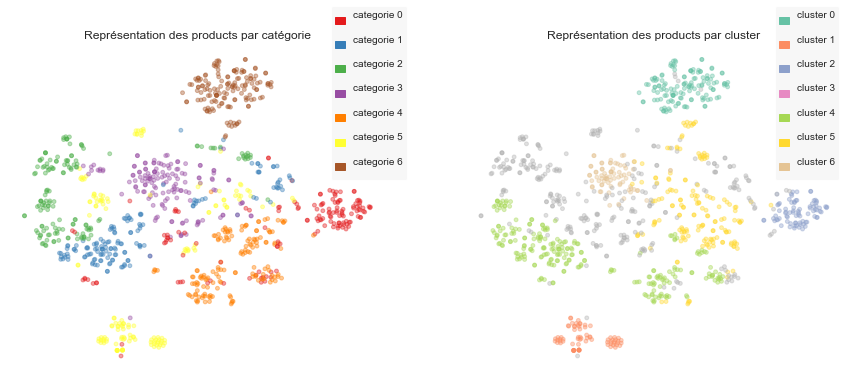

In [919]:
DF3 = Vectorizing (tfidf_vectorizer,  My_data_description, My_data_description)
plot_TSNE(DF3["vectorized_data"])

In [911]:
DF3["vectorized_data"]

aapno  abstract  ac750  adapter  adhesive  adidas  adsl  aero       air  akup  alfajr  allin  almond  aloevera  analog  andre  android  angel  animal  anodised    anti  antique  antiqueshop  apple   ar  arabian  arb  archies  aroma       art  artificial  artpiece  assorted  asus  attivo  avenue  baby  babyoye  background  bag  ball  balm  band  bank  base  basic      bath  battery  bazaar  bear  beautiful      bed  bedsheet  bee  beebay  beige  believe  bell  bella  berlin  bharatcraft       big  bird  birthday   bk  black  blanket    bleach      blue  bluetooth  blush      body  bodysuit  bonsai  bottle  bowl       box       boy   br  brass  brown  brush    bubble  bucket  buddha  bulb  cable  caliber  canvas  cap  card      care  carpet  cartoon  carved  case  casotec  casual  cell  ceramic  chair  charger  checkered  chinese  chokree  christmas  classic  clip  clock  club        cm  co2  coffee  collection     color  combo   comfort  comforter  compatible  computer  conditioner  connect  container  copper  core  corkscrew  cotonex    cotton  couple     cover  cow  craft  crafted  craftuno  cream  creation  creative  creme  crstl  crystal  crystle  crystle01   curtain  cushion  cute  cutter  dark       day  ddr2  decker  decor  decoration  decorative  deep  denim  deo  deodorant    design   dg  dia  diaper  digital  disney  dive  diviniti  diwan  dohar  dongli      door  doraemon    double  drawer  dress  drive       dry  dsl  dual  duvet  dv5  dv6  dynamic  edimax  edp  elegance  elephant  embroidered  enabled  engage  envy  ethnic  exotic    export  exporter  extender     extra  extract  eye    eyelet      face  facewash  facial    famous  fan  fantasy   fashion   fb  fern   fi  fiber  fit  flare  flavor  flexible  flippd    floral  floralina  fluid  fogg  food  force  frame  framed  franck      free  fruit  furnishingland  gallery  ganesh  ganesha  gateway  gathered   gb  gel  gen  geometric  gift  giftsthatwow  gigabit      girl  glass  glow  goddess      gold  golden  golmaalshop      good  grade  graphic     green  grey  gtw  guru  hair  hako  hamilton      hand  handcrafted  handicraft  handloom  handloomhub  handmade  hanging  happy  hard  hat  haveli     heart      high  hill  hmt  holder      home  honey  honour  hookah  hot  house   hp  hub   i3  ice  ideapad  idol  important      inch  independence  india  inflatable  intellect  intense  international  intex      iron  island   iw  jacadi    jaipur  jasmine  jewellery  jharoka  jrb  jug  juice  jump  jumpsuit  junction  kadhai  kalash       key  keyboard  kid  kidz      king  kit  kitchen  kliqvik  klub  kosher  krishna  kurta   la  lace  lal  lamp  lapguard  laptop     large  layered      leaf  league  led  legging  lemon  lemongrass  lenovo  letter  lid      life     light  line  linen  link  lip  lipstick  little  london      long  lord  lotion  love  luba  lucky  lunch   lx  mac  macbook  mache  magic  magnetic  magsafe  majesty      make  makeup  man  manicure  marble  maroon  marvel  massage  mat  maximum  mdf    medium  memore       men  mesleep     metal  metallino  milton  mini  mint  mixfruit  mkb   ml  mmull  mobile  modem  mom  monster  mouse  mug  multi  multicolor  musician  n150  n300  n600   na  nail  nappy  natural  nc11  neck  nehp  neo  net  netgear  new  night  nike  nkp  north  notebook  nutcase  ocean  offspring  oil  orange  original  oxyglow   pa      pack  pad   painted  painting  pair  palito  pant  papaya     paper  paris  park  party  pavilion   pc  peacock  pen  perucci  phone  photo     piece  pink  pizza   pk  plain  plant  plastic  plated  playboy  plo  polish  polka  polo  polyester  pooja  port  portable  portia  pot  pouch  power  powered   premium  pride     print   printed  printland  prithish  pro   product  protector  pulse  purple  purpledip  purpose  pyjama  queen  quilt  radha  raga  raja  rajasthan  rajasthani  rajo  rama  range  raymond  reading  rectangular      red  rega  regular  reiki  religious  repair  replacement

In [910]:
DF3["Ari_score"]

0.260699800087454

In [444]:
DF3["Centroids"]

array([[ 0.00000000e+00, -3.25260652e-19, -3.25260652e-18, ...,
         2.71050543e-20,  1.34647012e-03,  6.51109685e-03],
       [-2.71050543e-19,  3.25260652e-19, -4.33680869e-19, ...,
        -2.43945489e-19,  6.50521303e-19, -1.51788304e-18],
       [ 0.00000000e+00,  0.00000000e+00,  2.16840434e-19, ...,
         1.30354462e-03, -1.08420217e-19, -2.16840434e-19],
       ...,
       [ 1.36519492e-03, -1.08420217e-19,  2.42942496e-03, ...,
         5.94239568e-04,  2.69563378e-03, -8.67361738e-19],
       [-5.42101086e-20, -1.08420217e-19,  2.16840434e-19, ...,
        -2.71050543e-20,  1.08420217e-19, -6.50521303e-19],
       [ 4.18952309e-04,  2.48155778e-03,  1.96741968e-03, ...,
        -2.71050543e-20,  6.50521303e-19,  2.16840434e-19]])

In [445]:
from sklearn.manifold import TSNE

    
transformed_centroid= TSNE(n_components=2,
            perplexity=6,
            init='pca',
            random_state=42).fit_transform(DF3['Centroids'])
transformed_centroid

array([[ -2.2956495,  75.75024  ],
       [-84.73845  ,  -7.0280647],
       [ 45.50891  ,  28.30419  ],
       [ 28.347992 , -36.905914 ],
       [-67.216125 ,  58.000843 ],
       [-36.733715 , -54.324207 ],
       [-19.518106 ,  10.627516 ]], dtype=float32)

In [446]:
df_X_dense = pd.DataFrame(data = X_dense, columns=Colonne)

## Dimensional reduction

### Through a PCA

In [448]:
def PCA_reduction (X, N_components_ratio):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA(n_components=N_components_ratio)
    X_projected = pca.fit_transform(X_scaled)


    return X_projected

In [449]:
X_dense_Projected  = PCA_reduction (df_X_dense , 0.95 )

In [450]:
# cumsum = np.cumsum(pca.explained_variance_ratio_)
# cumsum

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

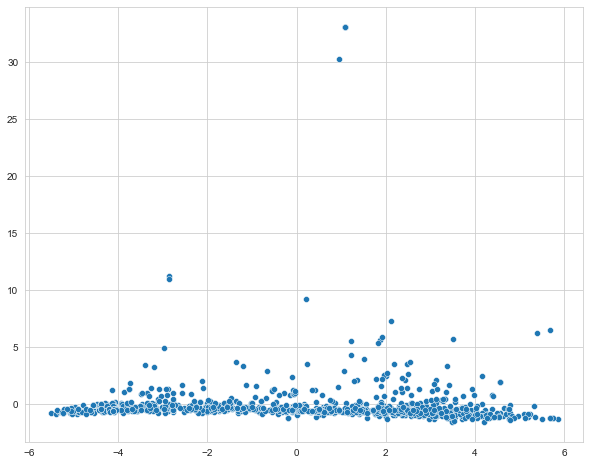

In [451]:
sns.color_palette('tab10')
x_axis = X_dense_Projected[:, 0]
y_axis = X_dense_Projected[:, 1]
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis,  palette=['red', 'green', 'blue', 'orange'])

In [452]:
X_product_name_projected= PCA_reduction (My_data_product_name, 0.95 )
X_name_and_Description_projected= PCA_reduction (My_data_Name_and_Description, 0.95 )

ValueError: could not convert string to float: 'elegance polyester multicolor abstract eyelet door curtain'

In [ ]:
X_pn_and_D_projected= PCA_reduction (dfpnadnD, 0.95 )

NameError: name 'dfpnadnD' is not defined

In [453]:
def Confusionmatrix (dataframe):

    import seaborn as sn
    import matplotlib.pyplot as plt
    kmeans = KMeans (n_clusters= 7, random_state = 42, init='random')

    # Setting the variables to keep
    features_std = dataframe

    # fitting the model
    kmeans.fit(features_std)

    # getting the predicted labels
    labels_pred = kmeans.labels_

    # Create crosstab: ct
    ct = pd.crosstab(data1['labels'], labels_pred)

    # plot the heatmap
    plt.figure(figsize = (10,7))
    ax = sn.heatmap(ct, annot=True, fmt='g')
    ax.set_xlabel('clusters')
    ax.set_ylabel('product categories')

    # fix a displaying problem
    ax.set_ylim(ax.get_ylim()[0]+0.5, ax.get_ylim()[1]-0.5)

In [454]:
from sklearn.manifold import TSNE
import time
time_start = time.time()
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(df)
T_sne = TSNE(n_components=2,
            perplexity=30,
            init='pca',
        random_state=42).fit_transform(X_dense_Projected)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 8.241731643676758 seconds


## graphing

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

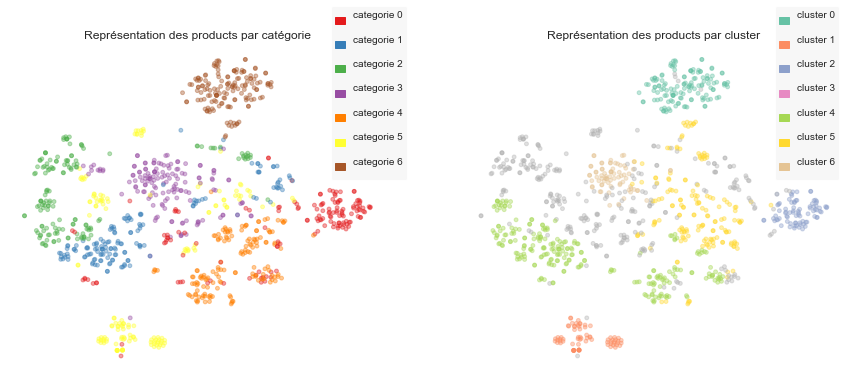

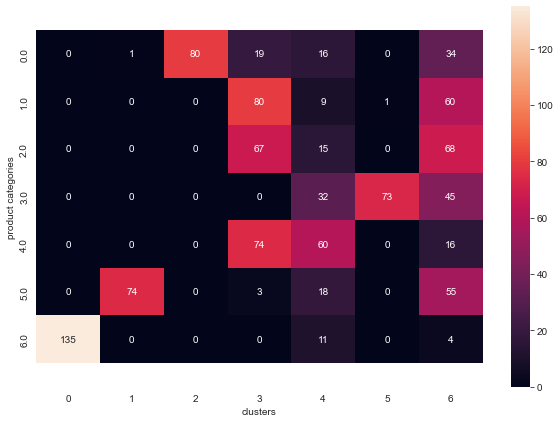

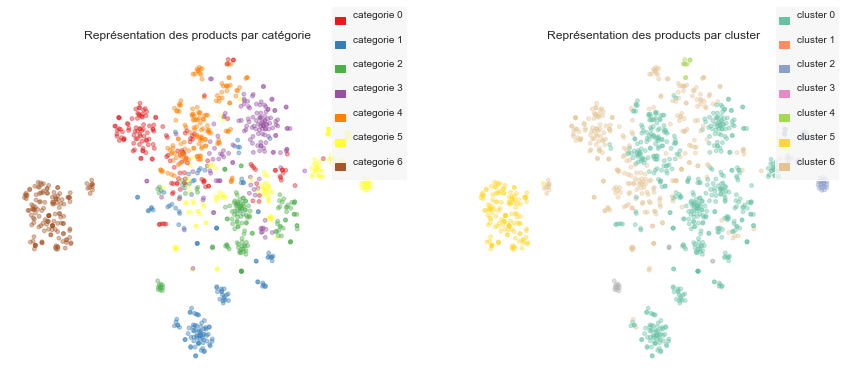

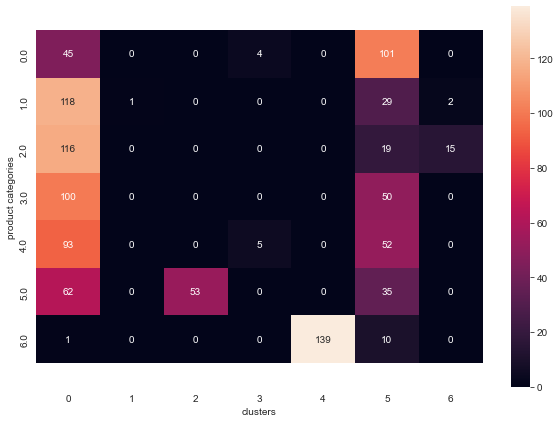

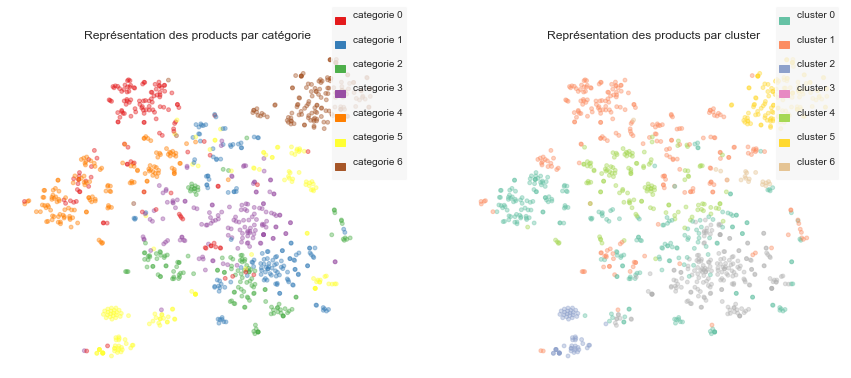

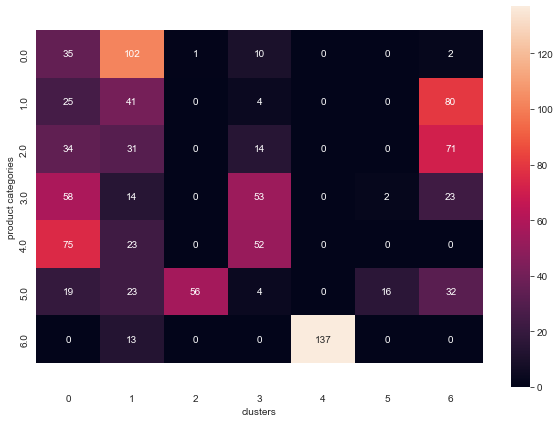

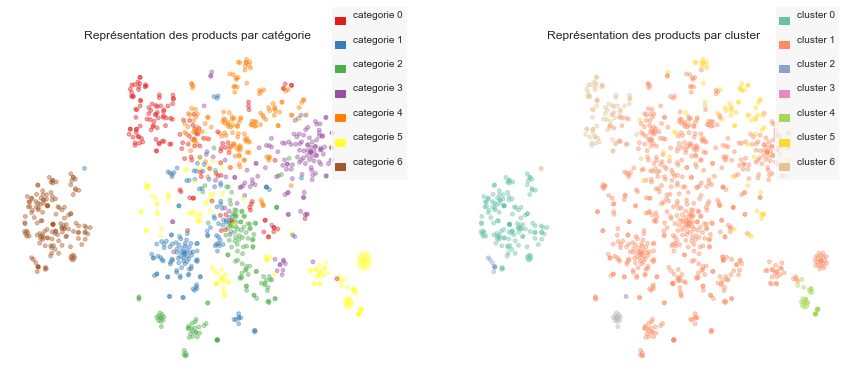

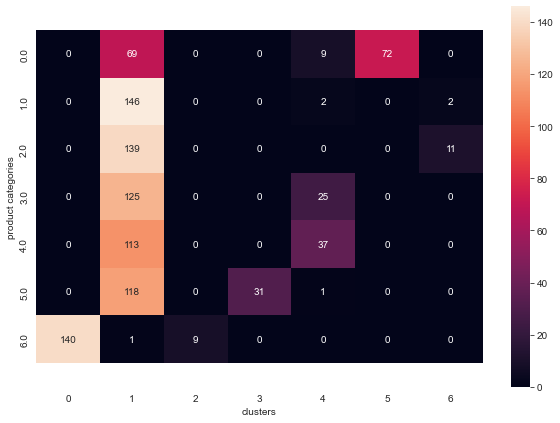

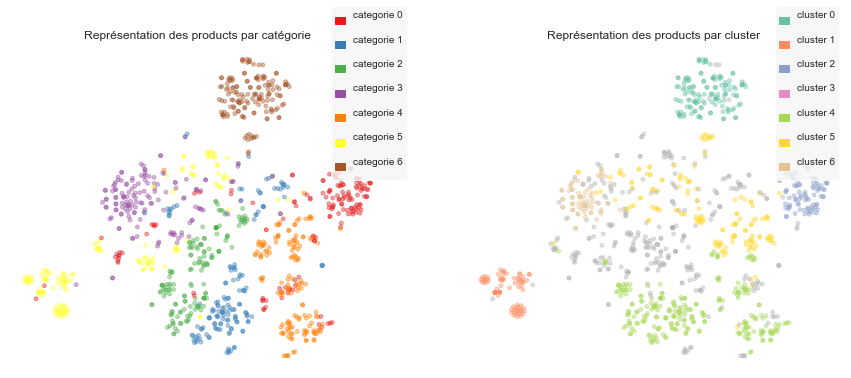

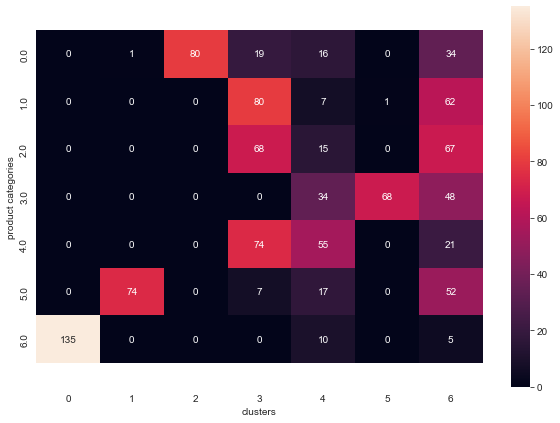

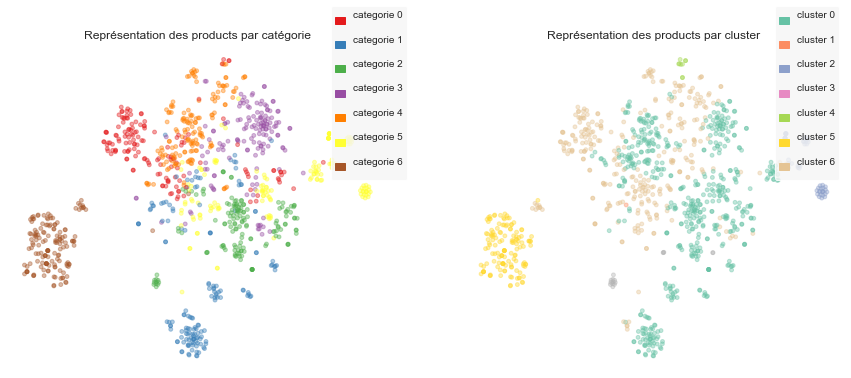

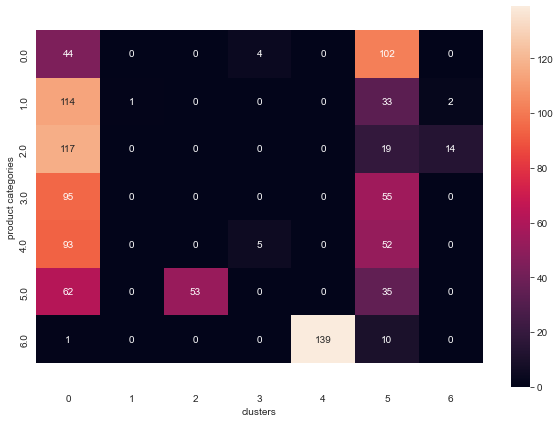

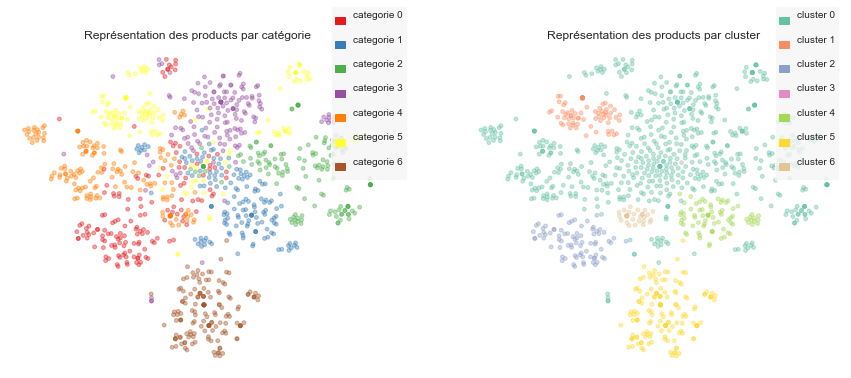

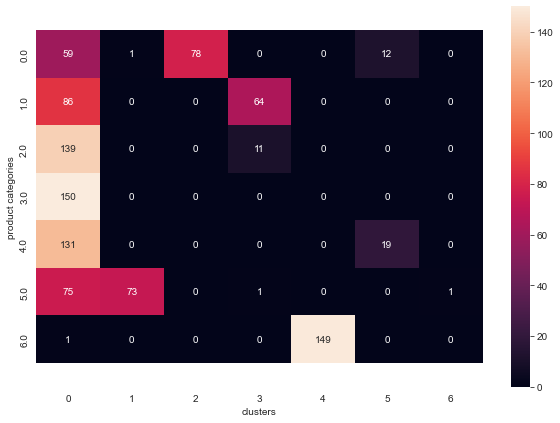

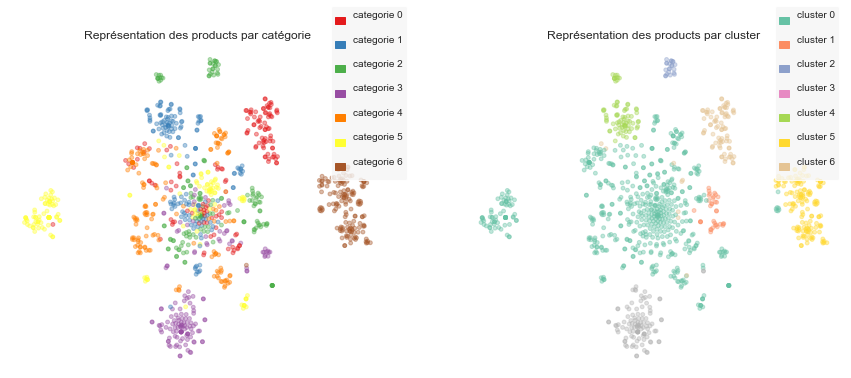

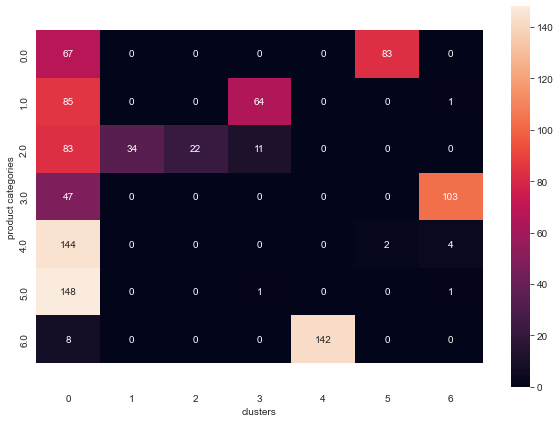

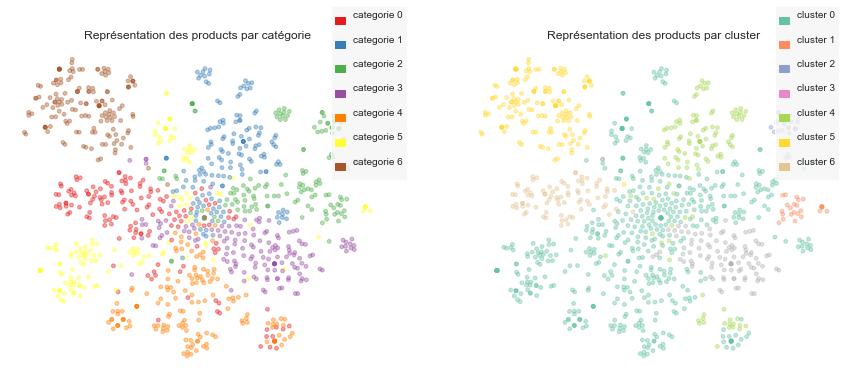

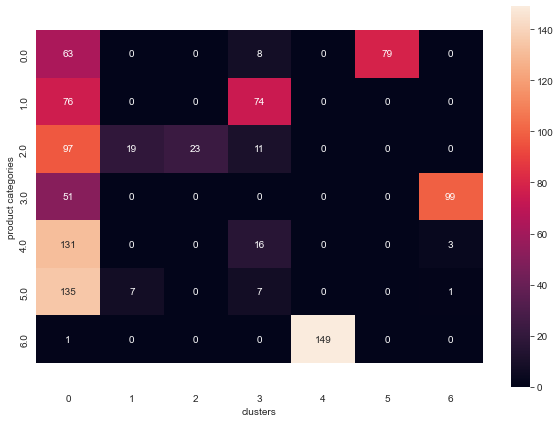

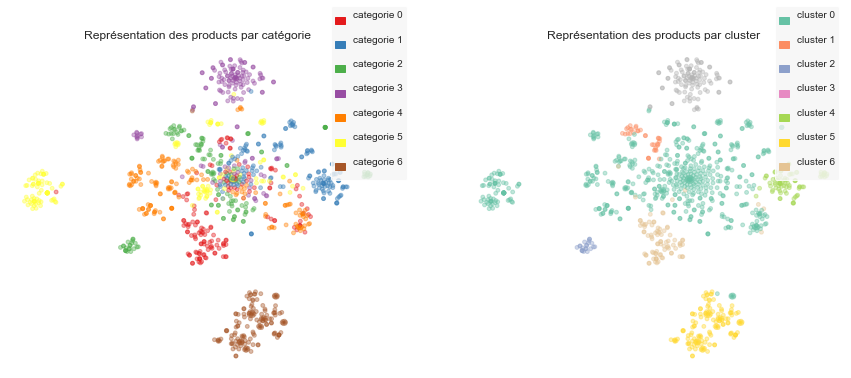

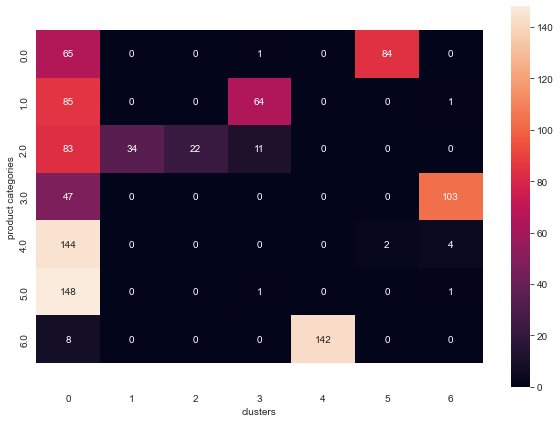

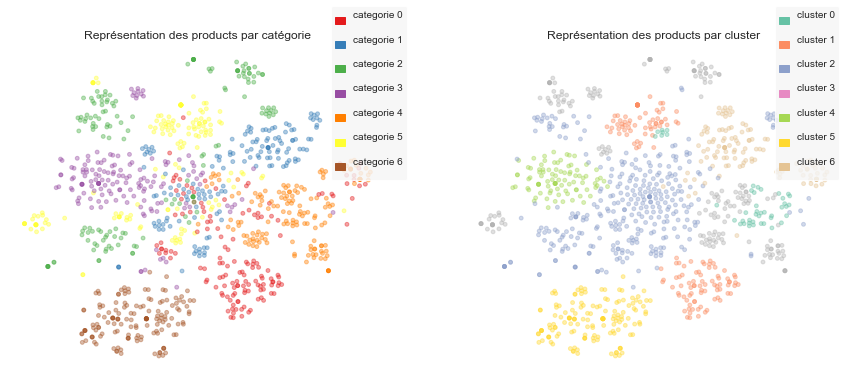

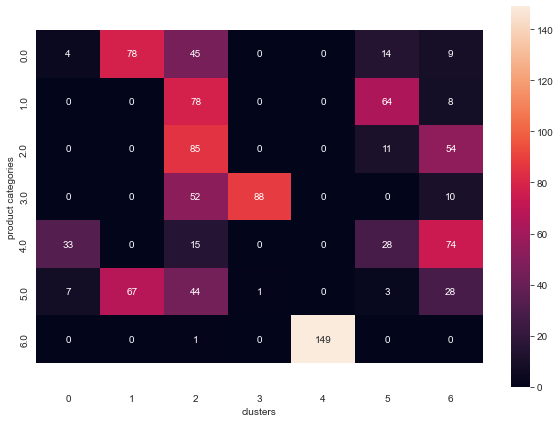

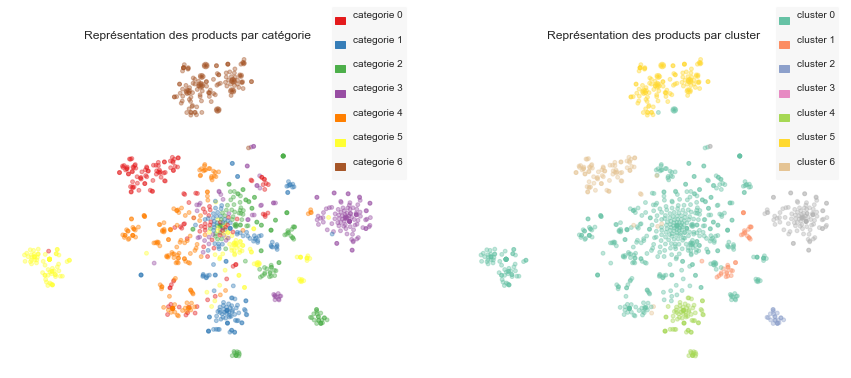

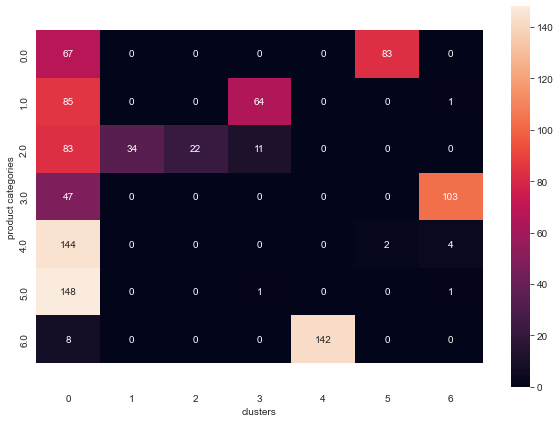

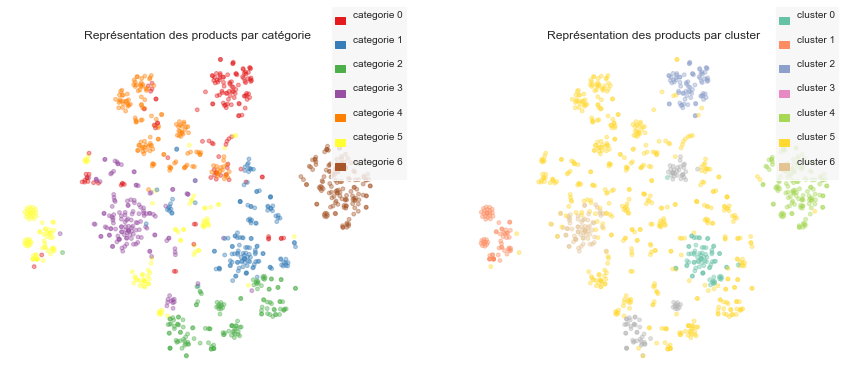

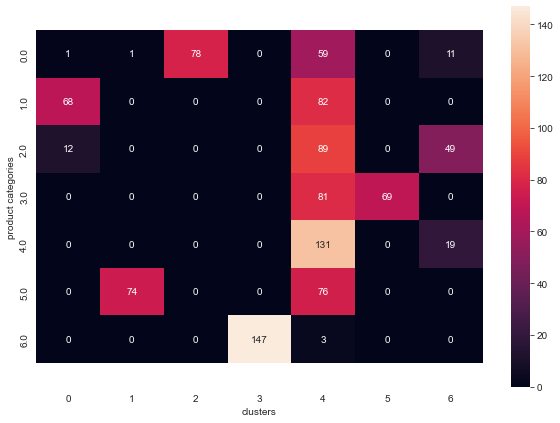

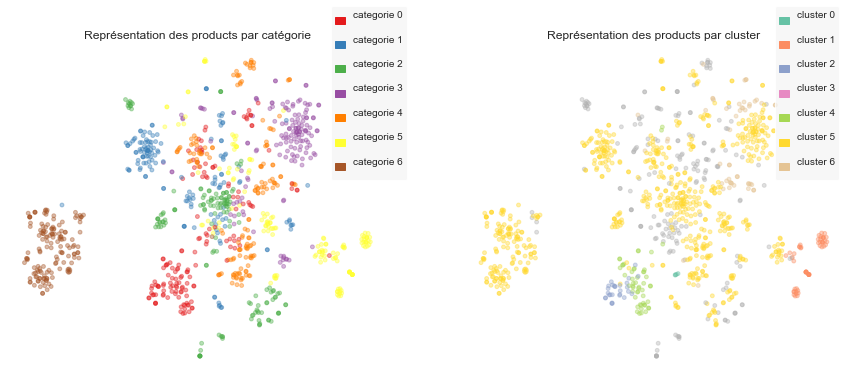

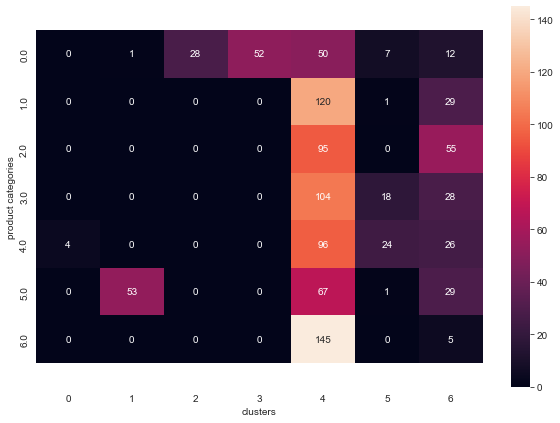

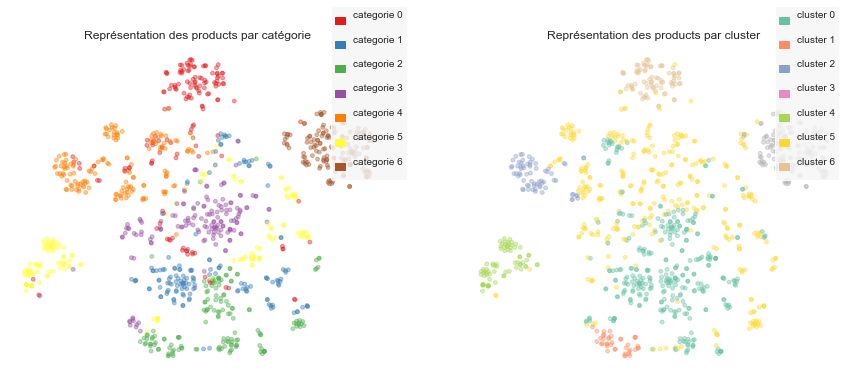

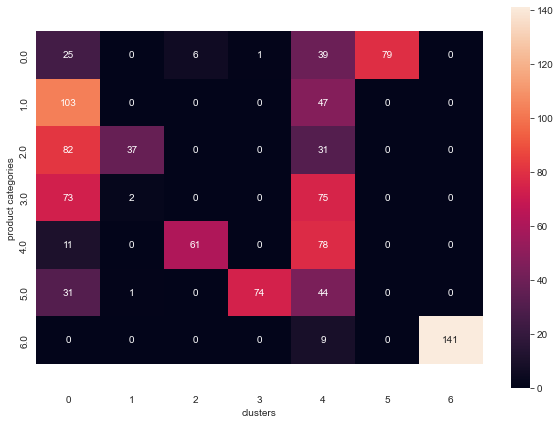

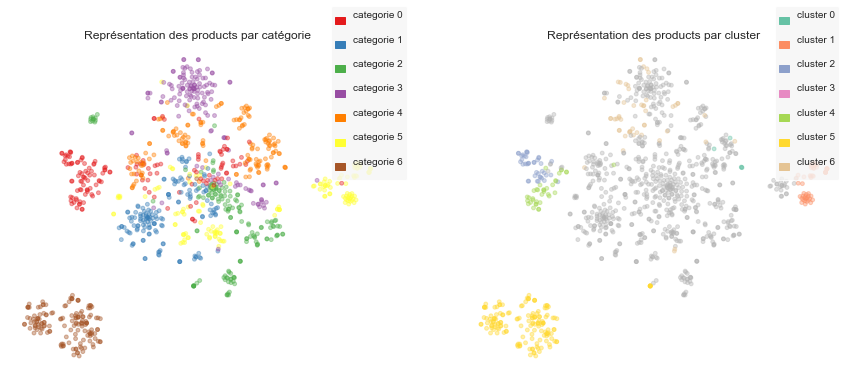

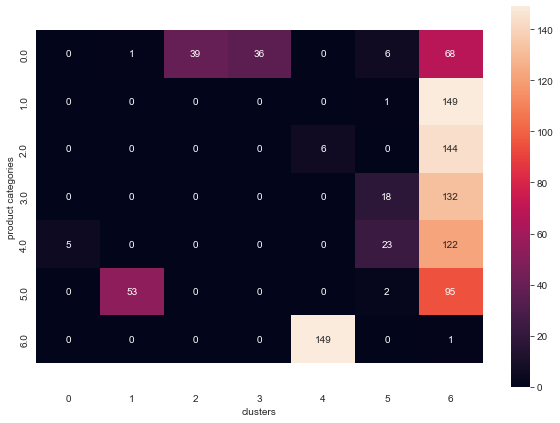

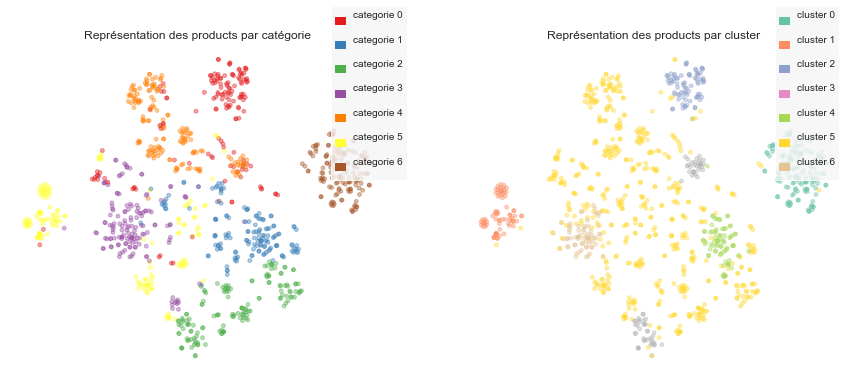

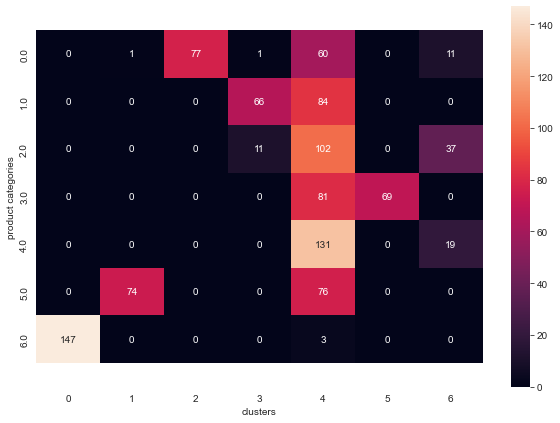

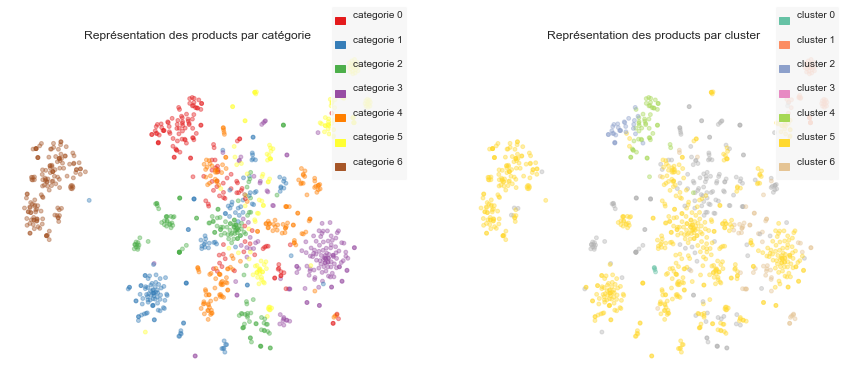

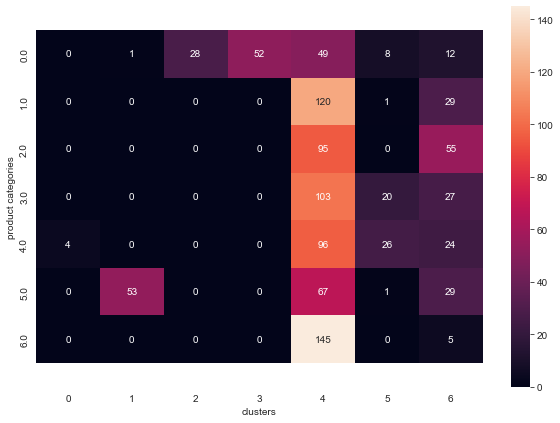

In [920]:
param_grid = list(ParameterGrid(
    {
    'Method' : [tfidf_vectorizer, count_vectorizer],
    'Corpus' : [My_data_description, My_data_product_name, My_data_Name_and_Description],
    'Data_fit' : [My_data_description, My_data_product_name, My_data_Name_and_Description]
    }))

for param in param_grid:
   Vector = Vectorizing(param['Method'], param['Corpus'], param['Data_fit'])
   plot_TSNE (Vector["vectorized_data"])
   Confusionmatrix((Vector["vectorized_data"]))



In [459]:
data_filtered


description                                       product_name                               Name_and_Description
0     key feature elegance polyester multicolor abst...  elegance polyester multicolor abstract eyelet ...  key feature elegance polyester multicolor abst...
1     specification sathiyas cotton bath towel 3 bat...                         sathiyas cotton bath towel  specification sathiyas cotton bath towel 3 bat...
2     key feature eurospa cotton terry face towel se...                eurospa cotton terry face towel set  key feature eurospa cotton terry face towel se...
3     key feature santosh royal fashion cotton print...  santosh royal fashion cotton printed king size...  key feature santosh royal fashion cotton print...
4     key feature jaipur print cotton floral king si...  jaipur print cotton floral king sized double b...  key feature jaipur print cotton floral king si...
...                                                 ...                                                ...                                                ...
1045  oren empower extra large self adhesive sticker...     oren empower extra large self adhesive sticker  oren empower extra large self adhesive sticker...
1046  wallmantra large vinyl sticker sticker pack 1 ...             wallmantra large vinyl sticker sticker  wallmantra large vinyl sticker sticker pack 1 ...
1047  buy uberlyfe extra large pigmented polyvinyl f...  uberlyfe extra large pigmented polyvinyl film ...  buy uberlyfe extra large pigmented polyvinyl f...
1048  buy wallmantra medium vinyl sticker sticker r ...            wallmantra medium vinyl sticker sticker  buy wallmantra medium vinyl sticker sticker r ...
1049  buy uberlyfe large vinyl sticker r 595 online ...                       uberlyfe large vinyl sticker  buy uberlyfe large vinyl sticker r 595 online ...

[1050 rows x 3 columns]

Via LDA

In [980]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Instanciation of the tf-idf vectorizer
tfidf_vectorizer = TfidfVectorizer(
    strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    analyzer='word',
    max_df=0.8,
    min_df=2,
    ngram_range=(1, 1),
)

# Application of the tf-idf vectorizer
corpus = data_filtered['Name_and_Description']
tf = tfidf_vectorizer.fit_transform(corpus)

# Instanciate LDA
lda = LatentDirichletAllocation(n_components=7, max_iter=5, learning_method='online', learning_offset=50.,random_state=42)

# Fitting the model
lda.fit(tf)

# Applying the model
LDA_text = lda.transform(tf)

In [981]:
LDA_text.shape

(1050, 7)

In [982]:
tfidf_vectorizer.get_feature_names_out ()

array(['aapno', 'ability', 'able', ..., 'yuva', 'zipper', 'zone'],
      dtype=object)

In [983]:
type(lda.components_)

numpy.ndarray

In [984]:
lda.components_.shape

(7, 2079)

In [985]:
len(LDA_text)

1050

In [986]:
tablo = np.array([5, 5, 66, 44, 3, 0, 23, -5, 43, 5.4, 4])
tablo.argsort()[:-3:-1]

array([2, 3], dtype=int64)

In [999]:
nb_of_words = 50
for topic_idx, topic_words in enumerate(lda.components_):
    print("Topic %d:" % (topic_idx))
    print(" ".join((tfidf_vectorizer.get_feature_names_out()[i]) for i in topic_words.argsort()[:-nb_of_words - 1:-1]))

Topic 0:
craft lip quilt deliveryrajasthan comforter gb single drive pen rajasthan balm maroon pepper abstract pencil mug interface smooth wheel silk black hp multicolor silver ceramic green cm coffee way multicolour usb pink specification refresh kid cool material shade dohar look glide liner good case flavor box soothing capacity printed model
Topic 1:
usb pizza fan charger vgn vaio power cutter hub smartpro port mobile android phone pin series adapter smart output rolling current enabled replacement portable cable tablet designed sony computer device connector quality customer keyboard powered voltage carry included smallest tr bank kliqvik cooling otg cord product repair laptop slice order
Topic 2:
watch analog com flipkart genuine cash shipping buy free guarantee replacement product men day online woman combo set discount india great abstract kadhai dial double sonata boy strap blanket delivery best digital led cell black battery single usb comforter gold quilt resistant price wat

In [1000]:
lda.components_[0].argsort()[56]

354

In [1001]:
lda.components_.shape

(7, 2079)

In [1002]:
tfidf_vectorizer.get_feature_names_out ()[342]

'compared'

In [1003]:
LDA_text[9,:]

array([0.02758642, 0.02758887, 0.83357044, 0.02843081, 0.02759265,
       0.02760787, 0.02762294])

In [1004]:
LDA_text[1].argsort()[6]

3

In [1005]:
LDA_text[4].argsort()[6]

3

In [1006]:
for i in range (len(LDA_text)):
    data1.loc[i,"lda_topic"] = LDA_text[i].argsort()[6]

c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [1008]:
data1["lda_topic"].value_counts()

3    453
2    429
6     68
5     64
1     30
0      4
4      2
Name: lda_topic, dtype: int64

In [1009]:
data1

product_name                                        description  labels  lda_topic
0     Elegance Polyester Multicolor Abstract Eyelet ...  Key Features of Elegance Polyester Multicolor ...     4.0          3
1                            Sathiyas Cotton Bath Towel  Specifications of Sathiyas Cotton Bath Towel (...     0.0          3
2                   Eurospa Cotton Terry Face Towel Set  Key Features of Eurospa Cotton Terry Face Towe...     0.0          3
3     SANTOSH ROYAL FASHION Cotton Printed King size...  Key Features of SANTOSH ROYAL FASHION Cotton P...     4.0          3
4     Jaipur Print Cotton Floral King sized Double B...  Key Features of Jaipur Print Cotton Floral Kin...     4.0          3
...                                                 ...                                                ...     ...        ...
1045     Oren Empower Extra Large Self Adhesive Sticker  Oren Empower Extra Large Self Adhesive Sticker...     0.0          3
1046             Wallmantra Large Vinyl Sticker Sticker  Wallmantra Large Vinyl Sticker Sticker (Pack o...     0.0          3
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...  Buy Uberlyfe Extra Large Pigmented Polyvinyl F...     0.0          2
1048            Wallmantra Medium Vinyl Sticker Sticker  Buy Wallmantra Medium Vinyl Sticker Sticker fo...     0.0          3
1049                       Uberlyfe Large Vinyl Sticker  Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...     0.0          3

[1050 rows x 4 columns]

In [1010]:
ARI = adjusted_rand_score (data1['labels'], data1['lda_topic'])
ARI

0.14464920243384505

In [1011]:
adjusted_rand_score ([0,0,0,1,1], [1,1,1,0,0])

1.0

In [998]:
def plot_LDA(components):
    
       # Setting the data to plot
    labels = ['topic_{}'.format(i) for i in range(len(components))]
    frequencies = components

    # Plotting
    fig = plt.figure(figsize=(14, 6))
    plt.title("To which topic do I belong to? (LDA)", fontsize=20)
    plt.pie(frequencies,
                autopct='%.2f',
            )

    plt.legend(labels, loc='upper right', )
    # plt.show()
    # return fig



In [928]:
# Belonging to topics for first item
def pie_belonging (product_number):
    print(data1['product_name'].iloc[product_number])
    plot_LDA(LDA_text[product_number,:])

Sathiyas Cotton Bath Towel


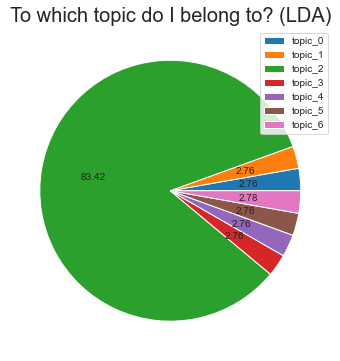

In [954]:
pie_belonging(1)

In [ ]:
for i in range len()

## 2nd PART : TEXT EMBEDDING

In [477]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim


In [478]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
sentences = data_filtered['Name_and_Description'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [479]:
sentences[0]

['key',
 'feature',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'cm',
 'height',
 'price',
 'curtain',
 'enhances',
 'look',
 'interior',
 'curtain',
 'made',
 'high',
 'quality',
 'polyester',
 'fabric',
 'feature',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'make',
 'room',
 'environment',
 'romantic',
 'loving',
 'curtain',
 'ant',
 'wrinkle',
 'anti',
 'shrinkage',
 'elegant',
 'apparance',
 'give',
 'home',
 'bright',
 'modernistic',
 'appeal',
 'design',
 'surreal',
 'attention',
 'sure',
 'steal',
 'heart',
 'contemporary',
 'eyelet',
 'valance',
 'curtain',
 'slide',
 'draw',
 'first',
 'thing',
 'morning',
 'welcome',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morning',
 'whole',
 'world',
 'draw',
 'close',
 'evening',
 'create',
 'special',
 'moment',
 'joyous',
 'beauty',
 'given',
 'soothing',
 'prin

In [480]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 5025
Word2Vec trained


In [481]:
model_vectors["baby"]

array([ 1.09497225e+00, -7.43275583e-01, -8.86714637e-01,  5.25606990e-01,
        1.66347897e+00,  3.04843128e-01,  1.06216618e-03, -2.47599483e-02,
        2.43146107e-01,  1.42556679e+00, -1.37112033e+00, -6.04629993e-01,
       -2.24360555e-01,  2.18293117e-03,  3.28844815e-01,  5.34563065e-01,
        9.89372075e-01, -2.70179600e-01, -6.61687460e-03,  1.06736302e-01,
       -9.14027214e-01, -1.51454270e-01,  1.98262537e+00,  8.04890871e-01,
       -1.42573684e-01,  3.63221616e-01, -3.69655430e-01, -3.29411685e-01,
        8.59521627e-01,  8.37564826e-01, -2.67713249e-01, -1.27955604e+00,
        3.38785052e-01, -1.61248934e+00,  1.06867313e+00,  7.10123330e-02,
        2.56500453e-01, -5.15878677e-01,  1.77206421e+00,  2.00465918e+00,
        1.73826802e+00, -8.45870972e-01, -6.23903930e-01, -1.36094785e+00,
        2.09790841e-02, -2.46963874e-01,  2.83350766e-01, -1.84855950e+00,
        5.59878610e-02,  1.38474441e+00,  2.02287197e+00,  1.24981165e+00,
       -9.19317424e-01, -

In [482]:
model_vectors.most_similar("baby")

[('romper', 0.581727921962738),
 ('striped', 0.537532389163971),
 ('dress', 0.5147914886474609),
 ('sleepsuit', 0.5122269988059998),
 ('girl', 0.5045720338821411),
 ('frock', 0.5013633370399475),
 ('cotton', 0.49708446860313416),
 ('neck', 0.4833314120769501),
 ('bodysuit', 0.48239830136299133),
 ('babeezworld', 0.4742851257324219)]

In [483]:
print(w2v_model)

Word2Vec<vocab=5025, vector_size=300, alpha=0.025>


In [484]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 5026


In [485]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (5026, 300)


In [486]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.08789631,  0.5195145 , -0.7735557 , ...,  0.31544605,
        -1.11103582, -0.18985622],
       [-0.20985785,  0.94010323, -0.86160326, ...,  0.91644424,
        -0.25225627, -0.59593314],
       ...,
       [ 0.05300365,  0.16716079,  0.13767087, ..., -0.05309411,
         0.0696852 ,  0.00975413],
       [-0.05803798, -0.04012851,  0.07703303, ..., -0.01104084,
        -0.0813069 , -0.00571445],
       [-0.01376987, -0.11630808,  0.12147991, ..., -0.03022532,
        -0.10479793, -0.04759056]])

In [487]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 24)]              0         
                                                                 
 embedding_2 (Embedding)     (None, 24, 300)           1507800   
                                                                 
 global_average_pooling1d_2   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 1,507,800
Trainable params: 1,507,800
Non-trainable params: 0
_________________________________________________________________


In [488]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 2ms/step


(1050, 300)

In [489]:
embeddings.shape

(1050, 300)

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


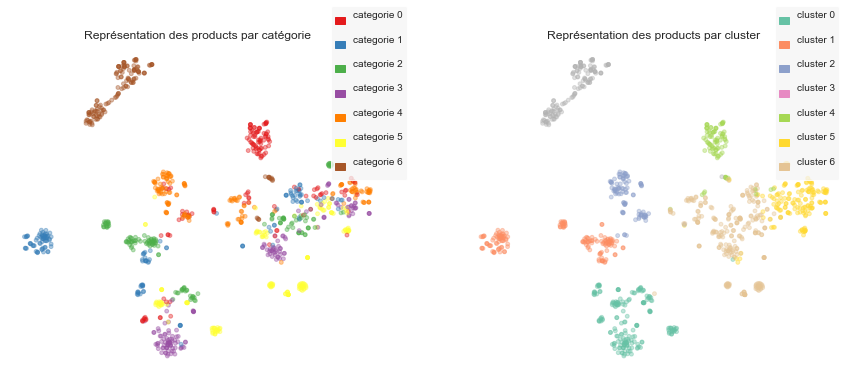

In [1012]:
plot_TSNE(embeddings)

In [1013]:
def ARI (dataframe):
     
    kmeans = KMeans (n_clusters= 7, random_state = 42, init='random')
    kmeans.fit(dataframe)
    labels_predicted = kmeans.labels_
   
    idx = data_filtered.index
    label_sample = data1.loc[idx, "labels"]

    ARI = adjusted_rand_score (label_sample, labels_predicted)

    return ARI

In [1014]:
ARI(embeddings)

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


0.29607880410960397

## BERT

In [1015]:
# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [1016]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

In [1017]:
features_bert.shape

(1050, 768)

In [1018]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = data_filtered['Name_and_Description'].to_list()

loading configuration file config.json from cache at C:\Users\DELL/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file tf_model.h5 from cache at C:\Users\DELL/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b

In [497]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

loading configuration file config.json from cache at C:\Users\DELL/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at C:\Users\DELL/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\vocab.txt

1/1 [==============================] - 1s 1s/step
temps traitement :  163.0


c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


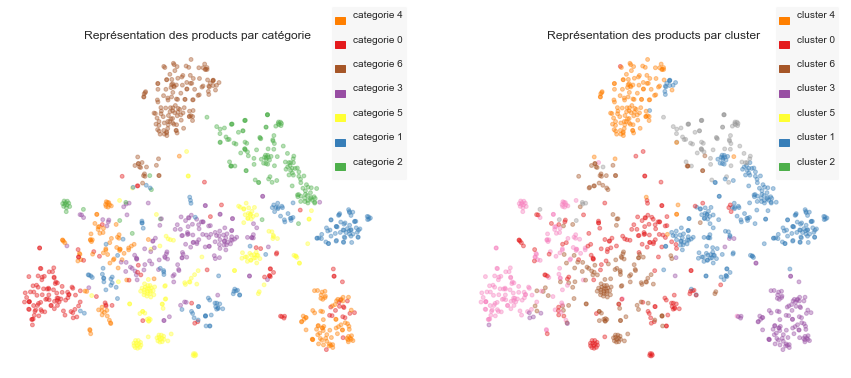

In [498]:
plot_TSNE(features_bert)

In [499]:
ARI(features_bert)

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


0.2721523116604055

In [507]:
import tensorflow_hub as hub
# import tensorflow_text 

# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [508]:
sentences = data_filtered['Name_and_Description'].to_list()

In [509]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='TFhub')

loading configuration file config.json from cache at C:\Users\DELL/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at C:\Users\DELL/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\vocab.txt

temps traitement :  141.0


c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


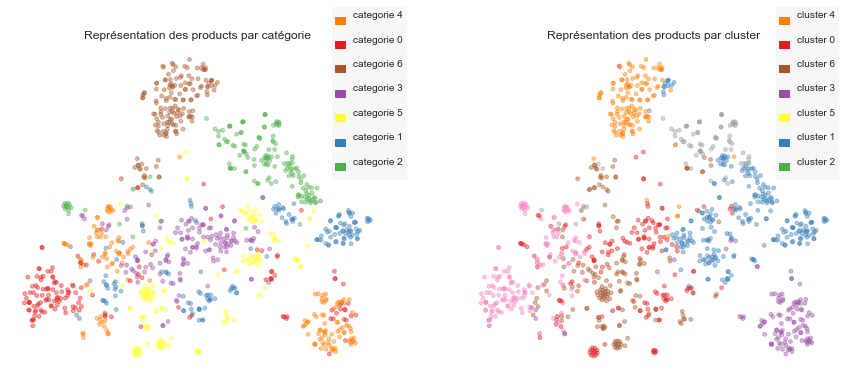

In [510]:
plot_TSNE(features_bert)

In [511]:
ARI(features_bert)

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


0.26616031376123783